ESTE PARCIAS FUE REALIZADO POR:

María Jose Ospina Samboni - 58539
ospinamj707@gmail.com

In [ ]:
#Uso e importación de la libreria Pandas para Python
import pandas as pd
#Uso e importación de la libreria Numpy para Python
import numpy as np
#Uso e importación de la libreria Skilearn para Python
from sklearn.model_selection import train_test_split as tts# Se usa para dividir el conjunto de entrenamiento y pruebas
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


# Librerias de visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

#Uso e importación para trabajar RED NEURONAL
from sklearn.neural_network import MLPClassifier

In [ ]:
#Cargar el conjunto de datos
sheet_id = '1zhjC9kDt4vzGmz_a7Ah7Uf-L7YzWNbwBzsSo3OkbSRA'
sheet_name = 'pd'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
datos = pd.read_csv(url, on_bad_lines='skip')

In [ ]:
#Informarnos sobre el datasset
datos

,Ventas,Precio que vendio,Entrada para la empresa,Ganancias,Personas que compraron,Categor’a de vendedor,Edad,US
0,9.50,138,73,11,276,Bad,42,No
1,11.22,111,48,16,260,Good,65,Yes
2,10.06,113,35,10,269,Medium,59,Yes
3,7.40,117,100,4,466,Medium,55,Yes
4,4.15,141,64,3,340,Bad,38,No
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,Good,33,Yes
396,6.14,139,23,3,37,Medium,55,Yes
397,7.41,162,26,12,368,Medium,40,Yes
398,5.94,100,79,7,284,Bad,50,No


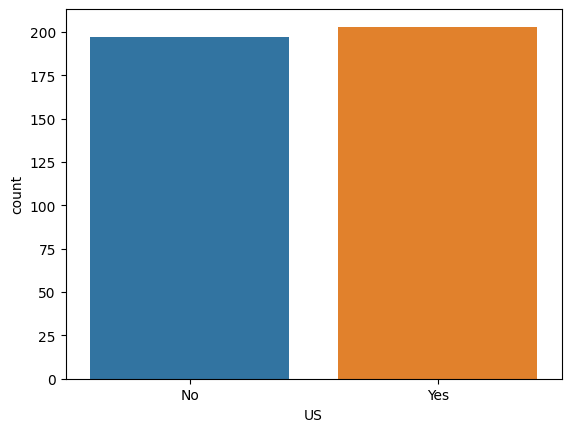

In [ ]:
#Visualizar dataset
sns.countplot(x = "US", data = datos)
plt.show()

In [ ]:
column = list(datos.columns)
column[len(column) - 3 ] = "Categoria_de_vendedor"
column[len(column) - 4 ] = "Personas_que_compraron"
column[len(column) - 6 ] = "Entrada_para_la_empresa"
column[len(column) - 7 ] = "Precio_que_vendio"
column

datos.columns = column

In [ ]:
def reemplazar(valor, num):
  datos.replace(valor, num, inplace=True)

reemplazar("Good", 1)
reemplazar("Medium", 2)
reemplazar("Bad", 3)
reemplazar("Yes", 1)
reemplazar("No", 2)

In [ ]:
#Seleccionar feactures
X = datos.drop(['US'], axis = 1)
#Seleccionar clase (Y)
y = datos['US']

In [ ]:
#Dividir el conjunto de entrenamiento y testeo (Train: 70%, Test:30)
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.7, random_state=36)
#X_train, X_test, y_train, y_test = tts(X, y, train_size=0.7, random_state=100)

In [ ]:
#Seleccionar un modelo ML
modeloG = GaussianNB()
#modeloKN = KNeighborsClassifier()
# Entrenar el modelo

modeloG.fit(X_train, y_train)

#modeloKN.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Prediccion del modelo
y_pred = modeloG.predict(X_test)

#y_pred = modeloKN.predict(X_test)

In [ ]:
# Resultados (Metricas de diagnostico)
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.80      0.82        61
           2       0.81      0.85      0.83        59

    accuracy                           0.82       120
   macro avg       0.83      0.83      0.82       120
weighted avg       0.83      0.82      0.82       120



# Un párrafo final que explique con sus propias palabras qué tan bueno fue el modelo, que dicen los resultados de las métricas diagnósticas y que encontró interesante en los clasificadores

*   Es interesante observar que el modelo Naive Bayes obtuvo un resultado de 0.82 en las métricas diagnósticas, esto indica que ha demostrado una buena capacidad para clasificar los datos de entrada. Este resultado es una medida del rendimiento del modelo y sugiere que puede ser utilizado de manera efectiva en una variedad de situaciones de clasificación.Me llamó la atención la capacidad del modelo Naive Bayes para hacer predicciones precisas utilizando una metodología simple y eficiente.
*   A partir de los resultados obtenidos en las métricas diagnósticas del modelo K-nearest neighbors, se puede decir que su capacidad para clasificar los datos de entrada no es precisa, ya que dió un resultado de 0.5. Este resultado sugiere que el modelo tiene una probabilidad del 50% de clasificar correctamente las entradas, lo que es menos que satisfactorio. Aunque K-nearest neighbors es una técnica de clasificación popular y simple de implementar, en este caso no demostró tener la capacidad suficiente para clasificar de manera efectiva los datos de entrada

* **COMPARACIÓN**
La principal diferencia entre los dos modelos es su capacidad para clasificar los datos de entrada. Mientras que el modelo Naive Bayes logró un resultado de 0.82 en las métricas diagnósticas, lo que indica una buena capacidad de clasificación, el modelo K-nearest neighbors obtuvo un resultado de 0.5, lo que sugiere que su capacidad de clasificación no es muy precisa. Además, mientras que Naive Bayes demostró una capacidad efectiva de predicción utilizando una metodología simple, K-nearest neighbors no demostró tener la capacidad suficiente para clasificar de manera efectiva los datos de entrada en este caso. En general, los resultados sugieren que Naive Bayes es una opción más efectiva para la clasificación de datos en comparación con K-nearest neighbors.